# Part 4 - Modeling

In [1]:
# Load packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset

df = pd.read_csv('Part_3.csv')
pd.set_option("display.max_columns", None)
display(df.head())

,loan_status,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,fico_score,fico_class,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verif_stat,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,year_issue,month_issue,year_ecl,month_ecl,geo_loc,geo_loc_ns,geo_loc_we,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,1,5000.0,36,10.65,162.87,10.0,24000.0,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,76.0,0.0,737,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2011,12,3,1,4,2,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,2500.0,60,15.27,59.83,0.0,30000.0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,76.0,0.0,742,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2011,12,2,4,3,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2400.0,36,15.96,84.33,10.0,12252.0,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,76.0,0.0,737,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2011,12,1,11,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,10000.0,36,13.49,339.31,10.0,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,76.0,0.0,692,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2011,12,2,2,4,2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,3000.0,60,12.69,67.79,1.0,80000.0,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,76.0,0.0,697,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2011,12,2,1,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Columns: 130 entries, loan_status to addr_state_WY
dtypes: float64(14), int64(116)
memory usage: 39.5 MB


In [4]:
# Checking nulls

round(100 * (df.isnull().sum() / len(df.index)), 2).value_counts()

0.0    130
dtype: int64

In [5]:
print(df.columns.tolist())

['loan_status', 'loan_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'fico_score', 'fico_class', 'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verif_stat', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolid

In [6]:
df.shape

(39786, 130)

In [7]:
# Copy of the Data Frame

df_copy = df

## Training models

### Data splitting and standardization

In [8]:
df.loan_status.value_counts()

1    34116
0     5670
Name: loan_status, dtype: int64

In [9]:
# Loading train_test_split

from sklearn.model_selection import train_test_split

In [10]:
# Spliting data into X and y and checking the shape

X = df.drop('loan_status', axis=1)
y = df['loan_status'].values

print(X.shape)
print(y.shape)

(39786, 129)
(39786,)


In [11]:
# Data splitting into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
# Checking the size of the data split

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(27850, 129)
(11936, 129)
(27850,)
(11936,)


In [13]:
# Data standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)


# df_scaled = pd.DataFrame(scaled_data, columns=df.drop('loan_status',axis=1).columns)
# df_scaled.head()

In [14]:
print("First row of X_scaled_train: \n", X_scaled_train[0])
print("First row of X_scaled_test: \n", X_scaled_test[0])

First row of X_scaled_train: 
 [-8.33414082e-01 -6.06308096e-01 -1.10308097e+00 -8.04104423e-01
  5.67480374e-01 -2.41114184e-01  1.44595932e-01 -3.01148528e-01
 -8.13723499e-01 -5.20087053e-01 -2.32894542e-01 -6.27373463e-01
  4.18220535e-01  1.80318132e-01 -2.09600856e-01 -2.13509756e-03
 -3.49801970e-01 -1.68849725e-01 -1.98426352e-01 -2.19037491e-01
  3.55695949e+00 -2.73632172e-01 -2.21813719e-01 -2.33932648e-01
 -2.80692622e-01 -2.59097628e-01 -2.70052411e-01 -2.38339415e-01
 -2.29892249e-01 -1.99304398e-01 -1.79465456e-01 -1.74502236e-01
 -1.54951609e-01 -1.87618057e-01 -1.73955259e-01 -1.60334432e-01
 -1.52627391e-01 -1.36169831e-01 -1.29593405e-01 -1.19174143e-01
 -1.07300776e-01 -1.03291736e-01 -9.26440168e-02 -7.81362321e-02
 -6.68755294e-02 -6.60580244e-02 -5.56555153e-02 -5.23103445e-02
 -4.56829453e-02 -3.49616660e-02 -3.93239522e-02 -2.74701384e-02
 -8.95092182e-01 -8.47457627e-03 -4.76156201e-02 -2.88141409e-01
  1.04880166e+00  1.19597219e-01 -2.00857333e-01  2.6150423

In [15]:
# Importing metrics and classification report

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score

In [16]:
# Function using to create a classification reports

def evaluate(prediction,y_test): 
    result = classification_report(y_test,prediction,output_dict=True, zero_division=1)
    f1 = result['1']['f1-score']
    accuracy = result['accuracy']
    performance_data= {'f1-score':round(f1, 2),
                      'accuracy':round(accuracy, 2)}
    return performance_data

### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_scaled_train, y_train)

DecisionTreeClassifier()

In [18]:
dt_prediction = dtree.predict(X_scaled_test)

In [19]:
print(classification_report(y_test, dt_prediction, zero_division=1))

dtree_pr= evaluate(dt_prediction, y_test)
dtree_pr

              precision    recall  f1-score   support

           0       0.21      0.23      0.22      1691
           1       0.87      0.86      0.86     10245

    accuracy                           0.77     11936
   macro avg       0.54      0.54      0.54     11936
weighted avg       0.78      0.77      0.77     11936



{'f1-score': 0.86, 'accuracy': 0.77}

In [20]:
# Calculating the number of predicted 0s and 1s

dtree_count = np.unique(dt_prediction, return_counts=True)
dtree_count

(array([0, 1], dtype=int64), array([ 1853, 10083], dtype=int64))

### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_scaled_train, y_train)

RandomForestClassifier()

In [22]:
rf_prediction = rf.predict(X_scaled_test)

In [23]:
print(classification_report(y_test, rf_prediction, zero_division=1))
rf_pr = evaluate(rf_prediction, y_test)
print(rf_pr)

              precision    recall  f1-score   support

           0       0.18      0.00      0.00      1691
           1       0.86      1.00      0.92     10245

    accuracy                           0.86     11936
   macro avg       0.52      0.50      0.46     11936
weighted avg       0.76      0.86      0.79     11936

{'f1-score': 0.92, 'accuracy': 0.86}


In [24]:
rf_count = np.unique(rf_prediction, return_counts=True)
rf_count

(array([0, 1], dtype=int64), array([   22, 11914], dtype=int64))

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_scaled_train, y_train)

LogisticRegression(random_state=42)

In [26]:
lr_prediction = lr.predict(X_scaled_test)

In [27]:
print(classification_report(y_test, lr_prediction, zero_division=1))
lr_pr = evaluate(lr_prediction, y_test)
print(lr_pr)

              precision    recall  f1-score   support

           0       0.56      0.02      0.03      1691
           1       0.86      1.00      0.92     10245

    accuracy                           0.86     11936
   macro avg       0.71      0.51      0.48     11936
weighted avg       0.82      0.86      0.80     11936

{'f1-score': 0.92, 'accuracy': 0.86}


In [28]:
lr_count = np.unique(lr_prediction, return_counts=True)
lr_count

(array([0, 1], dtype=int64), array([   54, 11882], dtype=int64))

### Naïve Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_scaled_train, y_train)

GaussianNB()

In [30]:
nb_prediction = nb.predict(X_scaled_test)

In [31]:
print(classification_report(y_test, nb_prediction, zero_division=1))
nb_pr = evaluate(nb_prediction, y_test)
print(nb_pr)

              precision    recall  f1-score   support

           0       0.15      0.98      0.26      1691
           1       0.96      0.07      0.13     10245

    accuracy                           0.20     11936
   macro avg       0.55      0.53      0.19     11936
weighted avg       0.84      0.20      0.15     11936

{'f1-score': 0.13, 'accuracy': 0.2}


In [32]:
nb_count = np.unique(nb_prediction, return_counts=True)
nb_count

(array([0, 1], dtype=int64), array([11205,   731], dtype=int64))

### K-Nearest Neighbors (KNN)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [34]:
knn.fit(X_scaled_train, y_train)

KNeighborsClassifier()

In [35]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [36]:
knn_prediction = knn.predict(X_scaled_test)

In [37]:
print(classification_report(knn_prediction, y_test, zero_division=1))
knn_pr = evaluate(knn_prediction, y_test)
knn_pr

              precision    recall  f1-score   support

           0       0.06      0.23      0.10       455
           1       0.97      0.86      0.91     11481

    accuracy                           0.84     11936
   macro avg       0.51      0.55      0.50     11936
weighted avg       0.93      0.84      0.88     11936



{'f1-score': 0.91, 'accuracy': 0.84}

In [38]:
knn_count = np.unique(knn_prediction, return_counts=True)
knn_count

(array([0, 1], dtype=int64), array([  455, 11481], dtype=int64))

### Multi Layer Perceptron Classifier (MLP)

In [39]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)

In [40]:
mlp.fit(X_scaled_train, y_train)

C:\Users\barte\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [41]:
mlp_prediction = mlp.predict(X_scaled_test)

In [42]:
print(classification_report(mlp_prediction, y_test, zero_division=1))
mlp_pr = evaluate(mlp_prediction, y_test)
mlp_pr

              precision    recall  f1-score   support

           0       0.20      0.22      0.21      1557
           1       0.88      0.87      0.88     10379

    accuracy                           0.78     11936
   macro avg       0.54      0.54      0.54     11936
weighted avg       0.79      0.78      0.79     11936



{'f1-score': 0.88, 'accuracy': 0.78}

In [43]:
mlp_count = np.unique(mlp_prediction, return_counts=True)
mlp_count

(array([0, 1], dtype=int64), array([ 1557, 10379], dtype=int64))

### XGBoost Classifier

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)

In [45]:
xgb.fit(X_scaled_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [46]:
xgb_prediction = xgb.predict(X_scaled_test)

In [47]:
print(classification_report(xgb_prediction, y_test, zero_division=1))
xgb_pr = evaluate(xgb_prediction, y_test)
xgb_pr

              precision    recall  f1-score   support

           0       0.05      0.34      0.09       248
           1       0.98      0.86      0.92     11688

    accuracy                           0.85     11936
   macro avg       0.52      0.60      0.50     11936
weighted avg       0.96      0.85      0.90     11936



{'f1-score': 0.92, 'accuracy': 0.85}

In [48]:
xgb_count = np.unique(xgb_prediction, return_counts=True)
xgb_count

(array([0, 1]), array([  248, 11688], dtype=int64))

In [49]:
prediction_data={'Model': ['Decision Tree',
                          'Random Forest',
                          'Logistic Regression',
                          'Naive Bayes',
                          'KNN',
                          'MLP',
                          'XGB'
                         ],
                 
                  'F1-score': [dtree_pr['f1-score'],
                              rf_pr['f1-score'],
                              lr_pr['f1-score'],
                              nb_pr['f1-score'],
                              knn_pr['f1-score'],
                              mlp_pr['f1-score'],
                              xgb_pr['f1-score']
                         ],
                 
                  'Accuracy': [dtree_pr['accuracy'],
                              rf_pr['accuracy'],
                              lr_pr['accuracy'],
                              nb_pr['accuracy'],
                              knn_pr['accuracy'],
                              mlp_pr['accuracy'],
                              xgb_pr['accuracy']
                         ],
                 
            'Balnce [0 : 1]': [dtree_count[1],
                              rf_count[1],
                              lr_count[1],
                              nb_count[1],
                              knn_count[1],
                              mlp_count[1],
                              xgb_count[1]
                              ]
                 
                    }
 
# Create DataFrame
prediction_table = pd.DataFrame(prediction_data)
prediction_table

,Model,F1-score,Accuracy,Balnce [0 : 1]
0,Decision Tree,0.86,0.77,"[1853, 10083]"
1,Random Forest,0.92,0.86,"[22, 11914]"
2,Logistic Regression,0.92,0.86,"[54, 11882]"
3,Naive Bayes,0.13,0.20,"[11205, 731]"
4,KNN,0.91,0.84,"[455, 11481]"
5,MLP,0.88,0.78,"[1557, 10379]"
6,XGB,0.92,0.85,"[248, 11688]"


The two models: Random Forest and Logistic Regression have the same high accuracy and f1_score but the answers are unbalanced (only a few negative answers (0) for Random Forest and Logistic Regression). This means that these models predict that most borrowers will repay their loans. The models: Decision Tree, KNN, MLP and XGB are characterized by better balanced data. The Naive Bayes algorithm shows an inversely proportional relationship between loan repayments than in the original data and also has the lowest scores.

## Data compression by PCA

In [50]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
pca.fit_transform(X_scaled_train)

array([[-1.33819517e+00,  6.32577285e-01, -2.10972732e+00, ...,
        -5.49426659e-15, -2.20678592e-14,  7.20668763e-15],
       [-6.51488103e-02, -1.48202483e+00, -1.57137062e+00, ...,
         1.93876873e-16, -3.27653128e-15, -1.54496549e-16],
       [ 2.32126749e+00, -1.71594972e+00,  1.62239285e+00, ...,
         1.25916247e-14,  3.29551112e-14, -4.59463992e-15],
       ...,
       [-3.32157559e+00, -8.12377491e-01,  4.82365251e-02, ...,
        -1.12653968e-15,  3.93556068e-16, -1.42788713e-16],
       [-2.78674240e-01,  6.87228962e-01, -2.49465286e+00, ...,
         9.40951263e-17, -4.63821575e-17,  4.44037498e-17],
       [ 1.63618670e+00, -2.69428119e+00,  5.94186183e-01, ...,
         8.96783143e-16, -1.53028442e-16, -1.51802022e-16]])

In [51]:
pca.components_[0]

array([ 2.05181260e-01,  1.90446745e-01,  4.28570525e-01,  1.97871325e-01,
        2.64126394e-02,  7.10253608e-02,  1.47012618e-01,  7.58068528e-02,
        3.11977835e-02,  6.41006394e-02,  6.98473431e-02,  1.46884186e-01,
        3.15005390e-01,  8.51437039e-02,  6.72438584e-02, -3.68791156e-01,
       -3.38689645e-01, -1.45189661e-01, -1.52141220e-01, -1.45117478e-01,
       -1.35378926e-01, -1.07851199e-01, -5.44865256e-02, -4.05715986e-02,
       -2.37114566e-02, -5.29003063e-03,  1.21117089e-02,  2.59088243e-02,
        4.03316524e-02,  3.43757707e-02,  4.03450482e-02,  4.77436276e-02,
        5.34394673e-02,  7.28440132e-02,  7.43217262e-02,  7.58570665e-02,
        7.73026168e-02,  7.74655807e-02,  7.83974487e-02,  7.84346098e-02,
        7.89158573e-02,  7.83329127e-02,  7.37738547e-02,  6.25906274e-02,
        5.88671332e-02,  6.02735924e-02,  5.45573511e-02,  5.35250263e-02,
        4.80353273e-02,  3.92101229e-02,  4.21136792e-02,  2.93084506e-02,
       -1.73288995e-02, -

In [52]:
# Percentage of variance explained by each of the selected components.

pca.explained_variance_ratio_

array([3.28943903e-02, 2.79959952e-02, 2.71946541e-02, 1.64469648e-02,
       1.42565042e-02, 1.33667478e-02, 1.23957719e-02, 1.15248573e-02,
       1.07118912e-02, 9.83944570e-03, 9.47224829e-03, 9.14016442e-03,
       8.96259938e-03, 8.86142014e-03, 8.79828468e-03, 8.77570895e-03,
       8.70772384e-03, 8.62509648e-03, 8.60534526e-03, 8.55955961e-03,
       8.54056256e-03, 8.51059753e-03, 8.48726491e-03, 8.48308372e-03,
       8.44045071e-03, 8.42716087e-03, 8.40352363e-03, 8.38458985e-03,
       8.36636900e-03, 8.31547158e-03, 8.30588815e-03, 8.26737295e-03,
       8.25486824e-03, 8.25035929e-03, 8.22602818e-03, 8.20362785e-03,
       8.19715695e-03, 8.17454788e-03, 8.15797122e-03, 8.15107018e-03,
       8.12378795e-03, 8.09540273e-03, 8.08470391e-03, 8.07593041e-03,
       8.07346211e-03, 8.05322287e-03, 8.04267402e-03, 8.02501994e-03,
       8.00497188e-03, 7.98056626e-03, 7.97847306e-03, 7.95530924e-03,
       7.94751368e-03, 7.94013935e-03, 7.92977104e-03, 7.92077173e-03,
      

In [53]:
# Cumulative sum of elements

var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.03289439, 0.06089039, 0.08808504, 0.104532  , 0.11878851,
       0.13215526, 0.14455103, 0.15607589, 0.16678778, 0.17662722,
       0.18609947, 0.19523964, 0.20420223, 0.21306365, 0.22186194,
       0.23063765, 0.23934537, 0.24797047, 0.25657581, 0.26513537,
       0.27367594, 0.28218653, 0.2906738 , 0.29915688, 0.30759733,
       0.31602449, 0.32442802, 0.33281261, 0.34117898, 0.34949445,
       0.35780034, 0.36606771, 0.37432258, 0.38257294, 0.39079896,
       0.39900259, 0.40719975, 0.4153743 , 0.42353227, 0.43168334,
       0.43980713, 0.44790253, 0.45598723, 0.46406316, 0.47213663,
       0.48018985, 0.48823252, 0.49625754, 0.50426251, 0.51224308,
       0.52022155, 0.52817686, 0.53612438, 0.54406452, 0.55199429,
       0.55991506, 0.56781297, 0.57569925, 0.58356808, 0.59142949,
       0.59928267, 0.60713122, 0.6149747 , 0.62279435, 0.63060753,
       0.63840828, 0.64619867, 0.65397134, 0.66173294, 0.66949315,
       0.67723514, 0.68496685, 0.69269225, 0.70040405, 0.70811

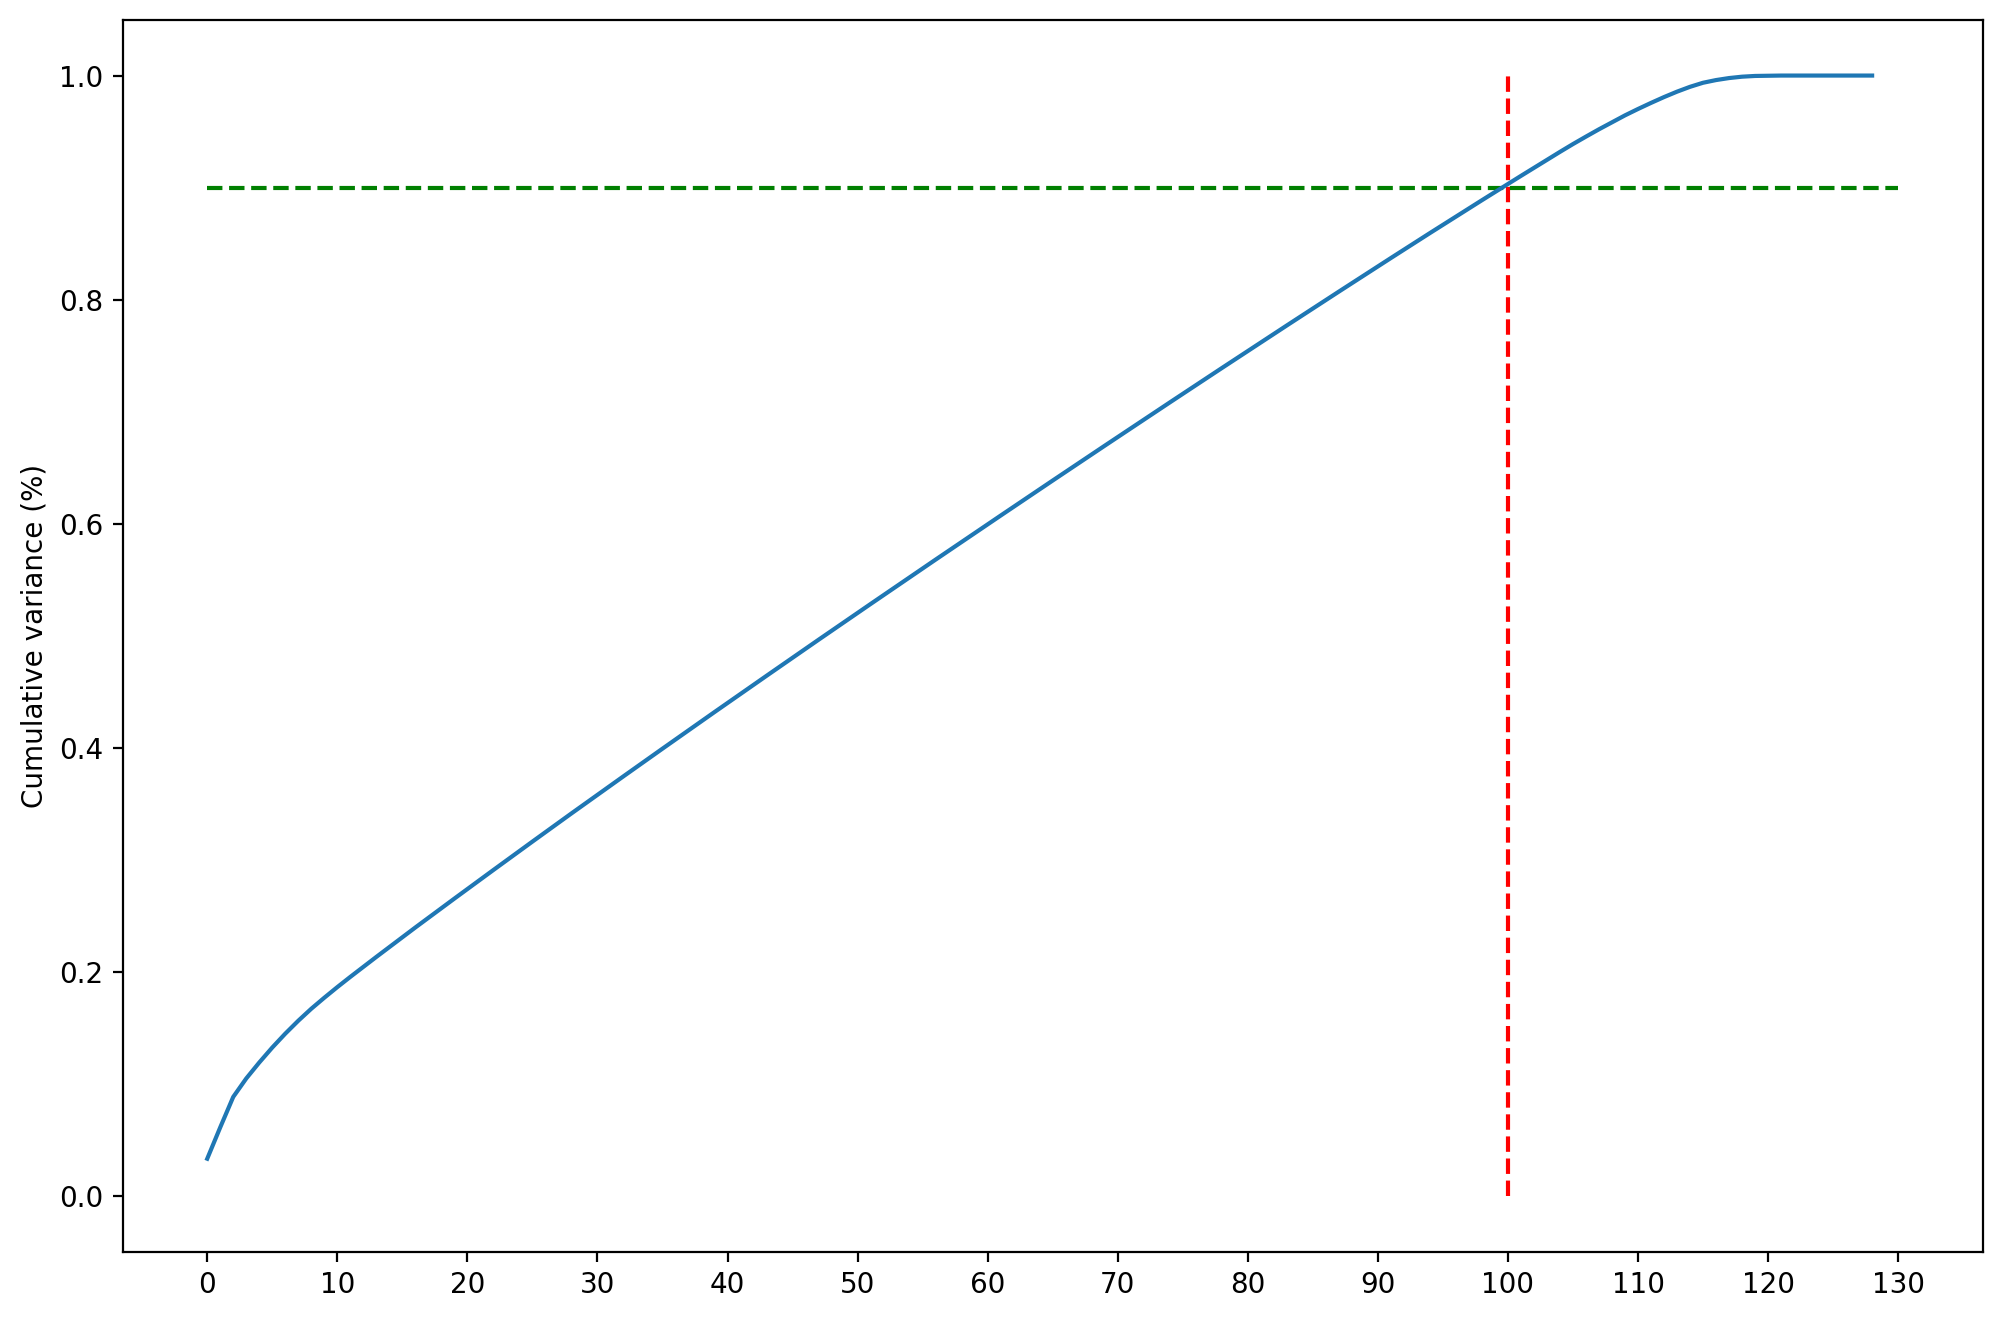

In [54]:
# Plotting the best number of PCA components

fig = plt.figure(figsize=[12,8], dpi=200)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130])
plt.vlines(x=100, ymax=1, ymin=0, colors='r', linestyles='--')
plt.hlines(y=0.90, xmax=130, xmin=0, colors='g', linestyles='--')
plt.plot(var_cumu)
plt.ylabel("Cumulative variance (%)")
plt.show()

In [55]:
# Data compression to 18 variables

pca_final = PCA(n_components=100)
X_pca_final = pca_final.fit_transform(X_scaled_train) 

In [56]:
print(X_pca_final.shape)

(27850, 100)


In [57]:
corrmat = np.corrcoef(X_pca_final.transpose())
corrmat.shape

(100, 100)

In [58]:
pca_df = pd.DataFrame(X_pca_final)
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-1.338022,0.632988,-2.109704,-0.865367,-1.206349,-0.066202,0.222995,-0.161924,-2.419132,-1.313507,-0.996263,0.684574,-1.515272,0.899333,-0.810071,-0.821932,-0.668979,-1.837211,0.882724,0.810858,-0.949794,0.323444,-0.496020,-0.110770,-1.531304,-0.968362,0.447644,-0.928789,0.849889,0.341866,0.049415,1.463230,0.024409,-0.445306,1.084505,0.164103,-0.951730,-0.886779,-0.510277,0.222276,0.966833,0.740157,0.262839,-0.643303,-0.831692,0.043147,0.109112,0.293596,-1.063734,0.801490,-0.159930,-0.969835,0.151929,-0.182230,-0.900184,-0.047211,0.008516,0.005202,-0.059124,0.479577,0.298412,0.028438,-0.627529,0.036665,0.171916,0.317503,0.430411,0.581090,0.650602,-0.056424,0.244454,-0.148091,-0.180605,0.220023,-0.348161,-0.540220,-0.097661,-0.012328,-0.218796,0.434043,-0.379872,0.266183,0.500763,0.588980,0.174089,0.593472,-1.035820,-0.256316,0.875332,0.691958,-0.541498,0.558963,0.121449,0.642410,0.258897,-0.073643,0.537690,0.422026,-0.215050,0.588477
1,-0.064915,-1.482136,-1.570909,0.708851,1.105504,-1.461998,-1.168206,1.850776,-0.606477,1.484051,-0.089059,-1.278569,-1.424282,-2.417628,0.035770,-0.518052,-0.829026,-0.208171,1.492833,0.978632,-0.049122,0.587440,0.112942,0.432474,-0.409942,-0.218362,-0.637133,-2.344682,-0.608382,0.460511,-0.902473,-1.568597,-0.774116,1.579693,0.429913,0.704270,-0.789676,-0.544702,-0.810121,0.042388,-0.332018,-0.708189,0.077451,-1.815077,0.388701,-1.151284,-0.363992,-0.038219,0.344654,1.544282,-0.314256,0.140058,-0.160612,1.552603,0.367822,0.595089,-0.525706,-0.096048,1.654872,-0.121724,0.063644,-0.494636,2.122385,-0.213945,0.257931,-1.422162,0.094412,0.544651,-0.420067,-0.110779,-0.048502,0.235667,-0.204194,1.498402,0.901073,1.076978,-0.464750,0.307110,0.114241,-0.156627,-0.796384,0.541463,-1.854784,-2.184398,0.211443,-1.854604,0.985855,1.547990,-0.342937,-0.318017,0.514248,-0.280784,-0.585414,-0.224040,-0.406074,-0.228556,-1.368981,-0.940166,-0.167087,1.094319
2,2.320713,-1.717214,1.622501,1.392763,1.678123,-1.177417,0.052208,-1.718770,-1.228012,0.204642,0.296308,0.476851,2.358585,-0.900266,0.854494,-0.736742,-0.963336,-1.164562,0.927100,-0.733654,1.536156,-0.273591,-0.269426,0.408291,-1.270122,-1.507253,0.091578,0.690122,-0.082109,1.457803,2.680982,1.236616,0.341355,0.109453,1.770004,-2.023191,-0.436680,0.695156,0.033032,-0.585303,-2.330506,-2.374422,-0.339900,0.979776,2.546812,2.022050,-1.364706,-1.230622,0.174512,2.576860,0.447007,0.925641,1.783496,-0.459806,0.869682,1.928228,-0.072409,-0.327069,0.996103,2.026701,0.299737,-0.362128,-0.430352,-0.634558,0.664836,0.215633,0.328079,-0.386754,2.586886,0.047198,1.515844,-0.430257,0.809857,-0.647156,1.520016,0.252596,-1.369038,0.684105,0.285138,0.288245,0.313409,-1.033894,0.381963,0.597459,-0.796656,-0.655711,-0.731521,0.232586,1.014466,1.535303,-1.669513,-0.700284,0.050701,0.362523,0.085680,0.810082,-1.763770,-0.077080,0.116742,0.789388
3,1.034017,-2.450160,1.006993,-0.590522,-0.937810,0.120904,-0.660836,-0.480186,0.642416,1.235880,2.399971,1.055523,0.005299,2.060131,-0.298128,2.160385,0.024563,0.331172,1.245240,0.120130,0.313463,0.645811,-1.248911,-1.750119,-0.695945,0.597590,-0.891173,0.010423,0.737668,-0.277294,-0.527334,-0.393881,-0.348765,0.271094,-0.001717,0.082920,0.121219,-0.978336,0.073636,-0.316434,-0.354501,0.429545,-0.317106,-0.155305,-0.236333,-0.858309,0.237823,0.414624,-0.025873,-0.568220,-0.182398,-0.143282,0.241211,-0.164194,0.263223,-0.208194,0.548930,-0.307604,-0.274342,-0.576264,0.129975,0.444469,-0.219575,-0.613443,-0.343532,0.561110,0.134700,0.047457,0.091053,-0.087407,0.802520,0.006964,0.151890,-0.561130,-0.095372,0.313607,-0.527826,0.175933,-0.116715,-0.101140,0.392789,0.528830,0.234862,-0.080354,0.017063,0.237109,-0.465586,0.288407,0.537766,-0.954197,0

In [59]:
pca_df.shape

(27850, 100)

## Training models after PCA

In [60]:
X_pca_train = X_pca_final
X_pca_test = pca_final.transform(X_scaled_test)

print(X_pca_train.shape)
print(X_pca_test.shape)

(27850, 100)
(11936, 100)


### Decision Tree

In [61]:
dtree_pca = DecisionTreeClassifier()
dtree_pca.fit(X_pca_train, y_train)

DecisionTreeClassifier()

In [62]:
dtree_pca_pred = dtree_pca.predict(X_pca_test)

In [63]:
print(classification_report(y_test, dtree_pca_pred, zero_division=1))

dtree_pca_pr = evaluate(dtree_pca_pred, y_test)
dtree_pca_pr

              precision    recall  f1-score   support

           0       0.18      0.21      0.20      1691
           1       0.87      0.84      0.86     10245

    accuracy                           0.75     11936
   macro avg       0.53      0.53      0.53     11936
weighted avg       0.77      0.75      0.76     11936



{'f1-score': 0.86, 'accuracy': 0.75}

In [64]:
dtree_pca_count = np.unique(dtree_pca_pred, return_counts=True)
dtree_pca_count

(array([0, 1], dtype=int64), array([1964, 9972], dtype=int64))

### Random Forest

In [65]:
rf_pca = RandomForestClassifier()
rf_pca.fit(X_pca_train, y_train)

RandomForestClassifier()

In [66]:
rf_pca_pred = rf_pca.predict(X_pca_test)

In [67]:
print(classification_report(y_test, rf_pca_pred, zero_division=1))

rf_pca_pr = evaluate(rf_pca_pred, y_test)
rf_pca_pr

              precision    recall  f1-score   support

           0       0.40      0.02      0.04      1691
           1       0.86      0.99      0.92     10245

    accuracy                           0.86     11936
   macro avg       0.63      0.51      0.48     11936
weighted avg       0.80      0.86      0.80     11936



{'f1-score': 0.92, 'accuracy': 0.86}

In [68]:
rf_pca_count = np.unique(rf_pca_pred, return_counts=True)
rf_pca_count

(array([0, 1], dtype=int64), array([   87, 11849], dtype=int64))

### Logistic Regression

In [69]:
lr_pca = LogisticRegression()
lr_pca.fit(X_pca_train, y_train)

LogisticRegression()

In [70]:
lr_pca_pred = lr_pca.predict(X_pca_test)

In [71]:
print(classification_report(y_test, lr_pca_pred, zero_division=1))

lr_pca_pr = evaluate(lr_pca_pred, y_test)
lr_pca_pr

              precision    recall  f1-score   support

           0       0.48      0.01      0.02      1691
           1       0.86      1.00      0.92     10245

    accuracy                           0.86     11936
   macro avg       0.67      0.50      0.47     11936
weighted avg       0.81      0.86      0.80     11936



{'f1-score': 0.92, 'accuracy': 0.86}

In [72]:
lr_pca_count = np.unique(lr_pca_pred, return_counts=True)
lr_pca_count

(array([0, 1], dtype=int64), array([   42, 11894], dtype=int64))

### Naïve Bayes

In [73]:
from sklearn.naive_bayes import GaussianNB
nb_pca = GaussianNB()
nb_pca.fit(X_pca_train, y_train)

GaussianNB()

In [74]:
nb_pca_pred = nb_pca.predict(X_pca_test)

In [75]:
print(classification_report(y_test, nb_pca_pred, zero_division=1))

nb_pca_pr = evaluate(nb_pca_pred, y_test)
nb_pca_pr

              precision    recall  f1-score   support

           0       0.19      0.23      0.21      1691
           1       0.87      0.84      0.85     10245

    accuracy                           0.75     11936
   macro avg       0.53      0.53      0.53     11936
weighted avg       0.77      0.75      0.76     11936



{'f1-score': 0.85, 'accuracy': 0.75}

In [76]:
nb_pca_count = np.unique(nb_pca_pred, return_counts=True)
nb_pca_count

(array([0, 1], dtype=int64), array([2077, 9859], dtype=int64))

### K Nearest Neighbors(KNN)

In [77]:
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca_train, y_train)

KNeighborsClassifier()

In [78]:
knn_pca_pred = knn_pca.predict(X_pca_test)

In [79]:
print(classification_report(y_test, knn_pca_pred, zero_division=1))

knn_pca_pr = evaluate(knn_pca_pred, y_test)
knn_pca_pr

              precision    recall  f1-score   support

           0       0.21      0.06      0.09      1691
           1       0.86      0.96      0.91     10245

    accuracy                           0.84     11936
   macro avg       0.54      0.51      0.50     11936
weighted avg       0.77      0.84      0.79     11936



{'f1-score': 0.91, 'accuracy': 0.84}

In [80]:
knn_pca_count = np.unique(knn_pca_pred, return_counts=True)
knn_pca_count

(array([0, 1], dtype=int64), array([  462, 11474], dtype=int64))

### Multi Layer Perceptron Classifier (MLP)

In [81]:
mlp_pca = MLPClassifier(random_state=42)
mlp_pca.fit(X_pca_train, y_train)

C:\Users\barte\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [82]:
mlp_pca_pred = mlp_pca.predict(X_pca_test)

In [83]:
print(classification_report(y_test, mlp_pca_pred, zero_division=1))

mlp_pca_pr = evaluate(mlp_pca_pred, y_test)
mlp_pca_pr

              precision    recall  f1-score   support

           0       0.24      0.18      0.21      1691
           1       0.87      0.91      0.89     10245

    accuracy                           0.80     11936
   macro avg       0.56      0.54      0.55     11936
weighted avg       0.78      0.80      0.79     11936



{'f1-score': 0.89, 'accuracy': 0.8}

In [84]:
mlp_pca_count = np.unique(mlp_pca_pred, return_counts=True)
mlp_pca_count

(array([0, 1], dtype=int64), array([ 1280, 10656], dtype=int64))

### XGBoost Classifier

In [85]:
xgb_pca = XGBClassifier(random_state=42)
xgb_pca.fit(X_pca_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [86]:
xgb_pca_pred = xgb_pca.predict(X_pca_test)

In [87]:
print(classification_report(y_test, xgb_pca_pred, zero_division=1))

xgb_pca_pr = evaluate(xgb_pca_pred, y_test)
xgb_pca_pr

              precision    recall  f1-score   support

           0       0.29      0.05      0.08      1691
           1       0.86      0.98      0.92     10245

    accuracy                           0.85     11936
   macro avg       0.58      0.51      0.50     11936
weighted avg       0.78      0.85      0.80     11936



{'f1-score': 0.92, 'accuracy': 0.85}

In [88]:
xgb_pca_count = np.unique(xgb_pca_pred, return_counts=True)
xgb_pca_count

(array([0, 1]), array([  278, 11658], dtype=int64))

In [89]:
pca_prediction_data={'Model': ['Decision Tree',
                              'Random Forest',
                              'Logistic Regression',
                              'Naive Bayes',
                              'KNN',
                              'MLP',
                              'XGB'
                               ],
                     
                   'F1-score': [dtree_pr['f1-score'],
                              rf_pr['f1-score'],
                              lr_pr['f1-score'],
                              nb_pr['f1-score'],
                              knn_pr['f1-score'],
                              mlp_pr['f1-score'],
                              xgb_pr['f1-score']
                               ],
                 
                   'Accuracy': [dtree_pr['accuracy'],
                              rf_pr['accuracy'],
                              lr_pr['accuracy'],
                              nb_pr['accuracy'],
                              knn_pr['accuracy'],
                              mlp_pr['accuracy'],
                              xgb_pr['accuracy']
                               ],
                     
         'F1-score after PCA':[dtree_pca_pr['f1-score'],
                              rf_pca_pr['f1-score'],
                              lr_pca_pr['f1-score'],
                              nb_pca_pr['f1-score'],
                              knn_pca_pr['f1-score'],
                              mlp_pca_pr['f1-score'],
                              xgb_pca_pr['f1-score']
                               ],
                               
         'Accuracy after PCA':[dtree_pca_pr['accuracy'],
                              rf_pca_pr['accuracy'],
                              lr_pca_pr['accuracy'],
                              nb_pca_pr['accuracy'],
                              knn_pca_pr['accuracy'],
                              mlp_pca_pr['accuracy'],
                              xgb_pca_pr['accuracy']
                               ],
                    
                     'Balnce [0 : 1]': [dtree_count[1],
                              rf_count[1],
                              lr_count[1],
                              nb_count[1],
                              knn_count[1],
                              mlp_count[1],
                              xgb_count[1]
                               ],
                     
            'Balnce after PCA [0 : 1]': [dtree_pca_count[1],
                              rf_pca_count[1],
                              lr_pca_count[1],
                              nb_pca_count[1],
                              knn_pca_count[1],
                              mlp_pca_count[1],
                              xgb_pca_count[1]
                               ]
                    }
 
# Create DataFrame
prediction_table_all = pd.DataFrame(pca_prediction_data)
prediction_table_all

,Model,F1-score,Accuracy,F1-score after PCA,Accuracy after PCA,Balnce [0 : 1],Balnce after PCA [0 : 1]
0,Decision Tree,0.86,0.77,0.86,0.75,"[1853, 10083]","[1964, 9972]"
1,Random Forest,0.92,0.86,0.92,0.86,"[22, 11914]","[87, 11849]"
2,Logistic Regression,0.92,0.86,0.92,0.86,"[54, 11882]","[42, 11894]"
3,Naive Bayes,0.13,0.20,0.85,0.75,"[11205, 731]","[2077, 9859]"
4,KNN,0.91,0.84,0.91,0.84,"[455, 11481]","[462, 11474]"
5,MLP,0.88,0.78,0.89,0.80,"[1557, 10379]","[1280, 10656]"
6,XGB,0.92,0.85,0.92,0.85,"[248, 11688]","[278, 11658]"


The results of the Naive Bayes algorithm significantly improved after applying PCA, and the proportion of predictions was also reversed. The MLP neural network model also improved its results, but only slightly. The results of the Random Forest, Logistic Regression, and XGB models remained unchanged and again indicated a poor proportion of responses 0 to responses 1. The KNN model has the same results after PCA as MLP and is slightly worse than before PCA, but has much weaker proportions between predictions. The Decision Tree algorithm has slightly worse results after PCA than before and a good proportion between predicted answers.

In [90]:
exit(0)

## Choosing one model and fitting the parameters

The Random Forest, Logistic Regression and the Support Vector Machine (SVM) seemed to be the best models with the highest F1-score and accuracy. The use of PCA on these models did not improve the results. All of these 3 models predicted that borrowers would always or almost always repay their loans (almost all predictions in y_pred were 1). Therefore, there was a choice between models: Decision Tree, Naive Bayes (before PCA) and K-NearestNeighbors(KNN). The K Nearest Neighbor (KNN) model was chosen as the final one for slightly better results - accuracy 0.78 and f1-score 0.88.

In [91]:
# Using standardized data from the previous KNN model (before PCA) and checking the shape

print(X_scaled_train.shape)
print(X_scaled_test.shape)
print(y_scaled_train.shape)
print(y_scaled_test.shape)

(27850, 129)
(11936, 129)


NameError: name 'y_scaled_train' is not defined

In [ ]:
# Searching for the best number of neighbors 

from sklearn.model_selection import cross_val_score

k_values = [i for i in range (1,6)]
scores = []

X_scaled_train = scaler.fit_transform(X_scaled_train)

for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_k, X_scaled_train, y_scaled_train, cv=5)
    scores.append(np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xticks([1, 2, 3, 4, 5])
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")


In [ ]:
acc_scores = pd.DataFrame({'n_neighbors': [1, 2, 3, 4, 5],
                           
                          'Accuracy': [scores[0],
                                       scores[1],
                                       scores[2],
                                       scores[3],
                                       scores[4],
                                                                             
                                      ]})

acc_scores.style.hide_index()

In [ ]:
# Gread Search Cross Validation for the best hyperparameters

from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [1, 2, 3, 4, 5],
               'weights' : ['uniform', 'distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, cv=3, n_jobs = -1)

In [ ]:
# Fitting the model on the train set

g_res = gs.fit(X_scaled_train, y_scaled_train)

In [ ]:
# Finding the best score

g_res.best_score_

In [ ]:
g_res.best_params_

In [ ]:
# Checking the data balance and confusion matrix

knn_5 = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_5.fit(X_scaled_train, y_scaled_train)

In [ ]:
y_pred5 = knn_5.predict(X_scaled_test)
count_y_pred5 = np.unique(y_pred5, return_counts=True)
count_y_pred5

In [ ]:
matrix_k5 = confusion_matrix(y_scaled_test, y_pred5)
matrix_k5

The high accuracy of this model is due to the very large number of true positive predictions. It is likely that the model will show positive loan capacity in most applications, which will be unfavorable for the loan company.

In [ ]:
knn_4 = KNeighborsClassifier(n_neighbors=4, metric='manhattan')
knn_4.fit(X_scaled_train, y_scaled_train)

In [ ]:
y_pred4 = knn_4.predict(X_scaled_test)
count_y_pred4 = np.unique(y_pred4, return_counts=True)
count_y_pred4

In [ ]:
matrix_k4 = confusion_matrix(y_scaled_test, y_pred4)
matrix_k4

In [ ]:
knn_3 = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_3.fit(X_scaled_train, y_scaled_train)

In [ ]:
y_pred3 = knn_3.predict(X_scaled_test)
count_y_pred3 = np.unique(y_pred3, return_counts=True)
count_y_pred3

In [ ]:
matrix_k3 = confusion_matrix(y_scaled_test, y_pred3)
matrix_k3

For the model with 4 and 3 neighbors, the situation is similar to the model with 5 neighbors.

In [ ]:
knn_2 = KNeighborsClassifier(n_neighbors=2, metric='manhattan')
knn_2.fit(X_scaled_train, y_scaled_train)

In [ ]:
y_pred2 = knn_2.predict(X_scaled_test)
count_y_pred2 = np.unique(y_pred2, return_counts=True)
count_y_pred2

In [ ]:
matrix_k2 = confusion_matrix(y_scaled_test, y_pred2)
matrix_k2

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn_1 = knn_1.fit(X_scaled_train, y_scaled_train)

In [ ]:
y_pred1 = knn_1.predict(X_scaled_test)
count_y_pred1 = np.unique(y_pred1, return_counts=True)
count_y_pred1

In [ ]:
matrix_k1 = confusion_matrix(y_scaled_test, y_pred1)
matrix_k1

In [ ]:
print(classification_report(y_scaled_test, y_pred1, zero_division=1))

knn_1_pr = evaluate(y_pred1, y_scaled_test)
knn_1_pr

For n_neighbors = 2 are more true negative (TN) answers and fewer true positive (TP) answers than for n_neighbors = 1. For n_neighbors = 2 the accuracy and f1_score were 0.72 and 0.83 and for n_neighbors = 1 the scores were 0.79 and 0.88 respectively. The KNN model with 1 neighbor was chosen as the final one after hyperparameters tuning.

In [ ]:
y_proba = knn.predict_proba(X_scaled_test)[:, 1]
y_proba

In [ ]:
# Ploting the roc_curve and calculating the roc_auc_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rp_auc = roc_auc_score(y_scaled_test, y_pred1)
rf_auc = roc_auc_score(y_scaled_test, y_proba)

# Summarizing scores
print('Random prediction: ROC AUC=%.3f' % (rp_auc))
print('KNN model: ROC AUC=%.3f' % (rf_auc))

# Calculating roc curves
rp_fpr, rp_tpr, _ = roc_curve(y_scaled_test, y_pred1)
rf_fpr, rf_tpr, _ = roc_curve(y_scaled_test, y_proba)

# Ploting the roc curve for the model
plt.figure(figsize=(12,8))
plt.plot(rp_fpr, rp_tpr, linestyle='--', label='Random prediction')
plt.plot(rf_fpr, rf_tpr, marker='.', label='KNN model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Prediction using the K Nearest Neighbors (KNN)

In [ ]:
# Prediction of first 20 values

print('Predicted values:', y_pred1[0:20])
print('Real values: \n', y_scaled_test[:20]) 

In [ ]:
print('Well-predicted values in testing:', (y_scaled_test == y_pred1).sum())
print('All values in testing part:', y_scaled_test.shape[0])
print()
print('Accuracy = Well-predicted values in testing part/ All values in testing part:', ((y_scaled_test == y_pred1).sum() / y_scaled_test.shape[0]).round(4))
print()
print('Accuracy with sklearn:', knn_1.score(X_scaled_test, y_scaled_test).round(4))

## Trying out the model on selected data

In [ ]:
# Correlation between loan_status and other features

df[df.columns[0:]].corr()['loan_status'][:].sort_values(key=abs, ascending=False)

In [ ]:
# Selection of variables to test the model (based not on the correlation with loan_status)

new_X = df[['int_rate', 'sub_grade', 'term', 'fico_score', 'loan_amnt']].values
new_y = y

In [ ]:
knn_1.fit(new_X, new_y)

In [ ]:
y_pred_new = knn_1.predict(new_X)

In [ ]:
print(new_y[:20].values)
print(y_pred_new[:20])

In [ ]:
knn_new_count = np.unique(y_pred_new, return_counts=True)
knn_new_count

In [ ]:
matrix_new = confusion_matrix(new_y, y_pred_new)
matrix_new

In [ ]:
print(classification_report(new_y, y_pred_new, zero_division=1))

knn_new_pr = evaluate(y_pred_new, new_y)
knn_new_pr

In [ ]:
# Enter the appropriate values to predict the probability that the loan will be repaid:

int_rate = float(input('Interest Rate on the loan: (5 - 25): '))
sub_grade = int(input('LC assigned loan subgrade (1 - 7 / 1: best): '))
term = int(input('The number of payments on the loan (36 or 60 months): '))
fico_score = int(input('FICO score (500 - 850): '))
loan_amnt = float(input('The listed amount of the loan applied for by the borrower (500 - 35000): '))

In [ ]:
# Predicting whether the customer will pay off the loan (0 - No or 1 - Yes)

print(knn_1.predict([[int_rate, sub_grade, term, fico_score, loan_amnt]]))

# Conclusion

The project, which concerns predicting whether Lending Club clients will pay off their loans, has been divided into 4 parts: Data Processing, Exploratory Data Analysis, Feature Engineering, and Modeling. After a thorough cleaning of the data and the introduction of new ones, machine learning models were implemented. Six of them were tested: Decision Tree, Logistic Regression, Random Forest, Naive Bayes, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN). The three models gave similar accuracy and f1-score results (Random Forest, Logistic Regression and Support Vector Machine). Based on the prepared data, the these 3 models predicted that the vast majority of the potential borrowers would repay their loan. Such a solution would be useless for the lending company. The three other models showed similar results. Finally, the K Nearest Neighbors model (the best model) was used to predict whether borrowers would be able to repay their loans. The dependent variables correlated with the target (loan_status) were selected and the K Nearest Neighbors model was built only with them. By manually entering the selected 5 variables mentioned above, the model predicts whether the new borrower will be able to repay the loan or not.